## Linear Model
Below, I implement a simple linear regression model with no data analysis/feature engineering yet. I have not had any experience in mid to high frequency prediction. In my experience, most features tend to have a linear relation with price, any non-linear impact can then be accounted for by implementing rolling-window regressions.

In [59]:
import pandas as pd 
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression

train = pd.read_csv('optiver-trading-at-the-close/train.csv')
test = pd.read_csv('optiver-trading-at-the-close/example_test_files/test.csv')
train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


### Final score for the linear model gave an MAE of about 9.5.
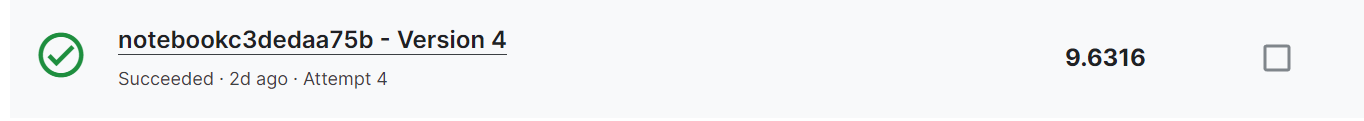

<Axes: title={'center': 'Stock 0 on Day 0 - How the order book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

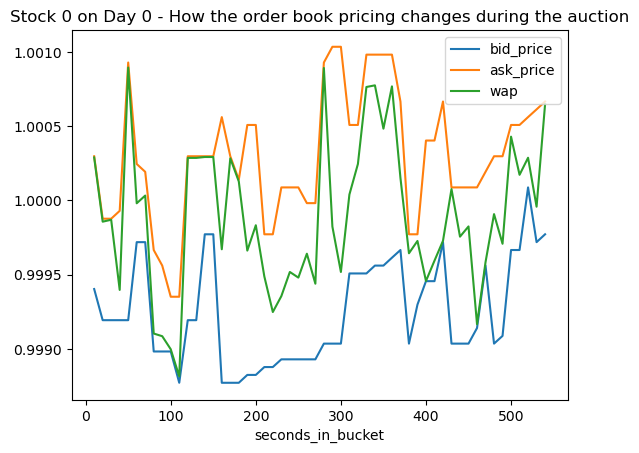

In [60]:
(
    train
    .query('stock_id ==2 & date_id ==0')
    [['seconds_in_bucket','bid_price','ask_price', 'wap']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')
)

<Axes: title={'center': 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

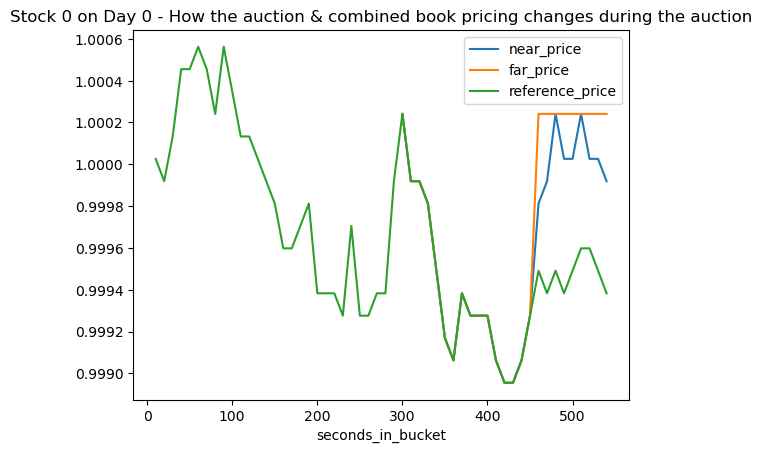

In [61]:
(
    train
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','near_price','far_price','reference_price']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title = 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')
)

<Axes: title={'center': 'Stock 0 on Day 0 - How the auction sizing changes during the auction period'}, xlabel='seconds_in_bucket'>

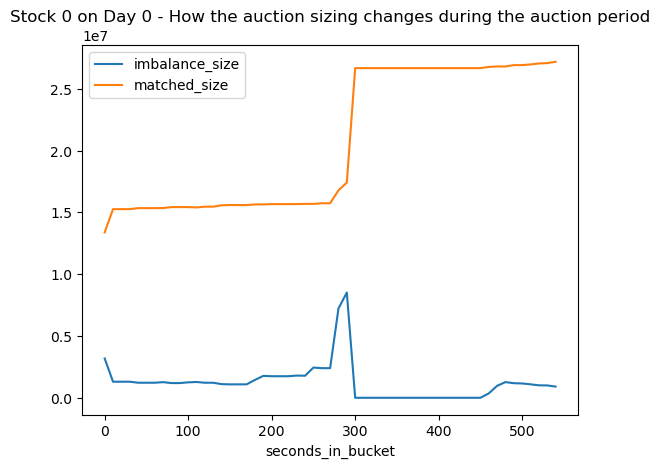

In [62]:
(
    train
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','imbalance_size','matched_size']]
    .set_index('seconds_in_bucket')
    .plot(title='Stock 0 on Day 0 - How the auction sizing changes during the auction period')
)

In [63]:
X = [col  for col in train.columns if col not in ['target','target_change','stock_id','date_id','time_id','seconds_in_bucket','row_id']]
#X = train[X].fillna(method = 'ffill').fillna(method = 'bfill').astype(float)
Y = train['target'].fillna(method ='ffill').fillna(method = 'bfill')

In [64]:
x_cols = [col  for col in train.columns if col not in ['target','target_change','stock_id','date_id','time_id','seconds_in_bucket','row_id']]
X = train[x_cols].fillna(method = 'ffill').fillna(method = 'bfill').astype(float)
Y = train['target'].fillna(method ='ffill').fillna(method = 'bfill')

model = LinearRegression().fit(X, Y)


In [65]:
test['predictions']= model.predict(test[x_cols].fillna(method = 'ffill').fillna(0))
actual = pd.read_csv('optiver-trading-at-the-close/example_test_files/revealed_targets.csv').dropna()

In [67]:
linear_prediction_mae = (actual['revealed_target']-test['predictions']).abs().mean()
print(f"MAE for Linear Model = {linear_prediction_mae}")

MAE for Linear Model = 7.168169280000058
